# Forecast/Timeshift

In [6]:
%matplotlib notebook
import os
import pandas as pd
import EWX_forecast as ewx

basepath = "C:\\Users\\wb5888\\LA-tools\\EWX_Forecast"
os.chdir(basepath)
workaround = os.path.join(basepath, 'forecast_workaround')
json_files = os.path.join(basepath, 'json')
csv_files = os.path.join(basepath, 'csv')

#mypath = "C:\\Users\\wb5888\\Documents\\IDR Data\\NEPOOL\\CLP"
#basepath = mypath

print('working in {}'.format(basepath))

working in C:\Users\wb5888\LA-tools\EWX_Forecast


In [7]:
files = ewx.sortdir(csv_files, 5)

files found in dir:  C:\Users\wb5888\LA-tools\EWX_Forecast\csv
                                               files                time
0                 NEPOOL_MECO_1537099023_ch3_adj.csv 2019-08-30 08:56:41
1       NEPOOL_MECO_1537099023_ch3_adj_timeshift.csv 2019-08-30 08:43:50
2             NEPOOL_MECO_1537099023_ch3_adj_val.csv 2019-08-30 08:43:46
3  NEPOOL_BECO_28344590048_forecast_adj_timeshift... 2019-08-29 16:26:15
4       NEPOOL_BECO_28344590048_forecast_adj_val.csv 2019-08-29 15:50:44


In [8]:
myfiles = files.files[[0]]
myfiles

0    NEPOOL_MECO_1537099023_ch3_adj.csv
Name: files, dtype: object

In [9]:
for f in myfiles:
    ch3 = ewx.forecast_main(f, 10, csv_files, csv_files)

parsing data files...
using filename NEPOOL_MECO_1537099023_ch3_adj.csv.
            Time  NEPOOL_MECO_1537099023,3
0  1/1/2019 0:00                     587.5
1  1/1/2019 1:00                     645.0
2  1/1/2019 2:00                     640.9
3  1/1/2019 3:00                     645.7
4  1/1/2019 4:00                     664.4
read NEPOOL_MECO_1537099023_ch3_adj.csv from C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...
writing validated usage file to .csv...
wrote NEPOOL_MECO_1537099023_ch3_adj.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
forecasting...
forecasted year 0 of 10 with 8736 reads.
forecasted year 1 of 10 with 8736 reads.
forecasted year 2 of 10 with 8736 reads.
forecasted year 3 of 10 with 8736 reads.
forecasted year 4 of 10 with 8736 reads.
forecasted year 5 of 10 with 8736 reads.
forecasted year 6 of 10 with 8736 reads.
forecasted year 7 of 10 with 8736 reads.
forecasted y

<IPython.core.display.Javascript object>


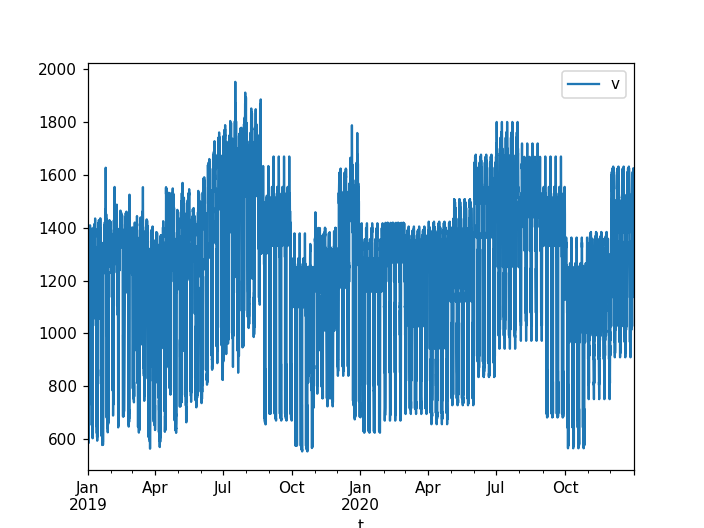

In [10]:
ch3[ch3.index.year < 2021].plot(y = 'v')
#ch3.plot(y = 'v')

In [19]:
for f in files.files[:2]:
    os.chdir(json_files)
    csv = ewx.parse_ewx(f)
    fname = "_".join(f.split('_')[1:])
    writename = fname.replace('.json', '.csv')
    os.chdir(csv_files)
    csv.to_csv(writename)

loading json...
found 12 reads, creating dataset.
saving to dataframe...
loading json...
found 12 reads, creating dataset.
saving to dataframe...


In [15]:
files = ewx.sortdir(csv_files, 20)

files found in dir:  C:\Users\wb5888\LA-tools\EWX_Forecast\csv
                                    files                time
0   NEPOOL_PSNH_80056420179_timeshift.csv 2019-08-16 10:21:52
1         NEPOOL_PSNH_80056420179_val.csv 2019-08-16 10:21:50
2   NEPOOL_PSNH_80056420252_timeshift.csv 2019-08-16 10:21:48
3         NEPOOL_PSNH_80056420252_val.csv 2019-08-16 10:21:46
4   NEPOOL_PSNH_80056420336_timeshift.csv 2019-08-16 10:21:42
5         NEPOOL_PSNH_80056420336_val.csv 2019-08-16 10:21:40
6   NEPOOL_PSNH_80019320243_timeshift.csv 2019-08-16 10:21:36
7         NEPOOL_PSNH_80019320243_val.csv 2019-08-16 10:21:34
8   NEPOOL_PSNH_80019320326_timeshift.csv 2019-08-16 10:21:31
9         NEPOOL_PSNH_80019320326_val.csv 2019-08-16 10:21:30
10  NEPOOL_CMP_035010704795_timeshift.csv 2019-08-16 10:21:27
11  NEPOOL_CMP_035010707012_timeshift.csv 2019-08-16 10:21:26
12        NEPOOL_CMP_035010704795_val.csv 2019-08-16 10:21:26
13        NEPOOL_CMP_035010707012_val.csv 2019-08-16 10:21:25
14     

In [25]:
a = [len(a.split('_')) > 3 for a in files.files]

b = []
for fname in files.files:
    try:
        out = (fname.split('_')[3] == 'timeshift.csv')
        
    except:
        out = False
    
    b.append(out)
    
c = [a and b for a, b in zip(a, b)]

In [43]:
import datetime as dt

ts = files.files[c]
now = dt.datetime.today()

for fname in ts:
    tmp = pd.read_csv(fname, header = None)
    tmp.columns = ['t', 'v']
    tmp['t'] = pd.to_datetime(tmp['t'])
    index = [t < now for t in tmp.t]
    tmp2 = tmp[index]
    tmp2.to_csv(fname, header = None, index = None)
    print('wrote {} to disk.'.format(fname))

wrote NEPOOL_PSNH_80056420179_timeshift.csv to disk.
wrote NEPOOL_PSNH_80056420252_timeshift.csv to disk.
wrote NEPOOL_PSNH_80056420336_timeshift.csv to disk.
wrote NEPOOL_PSNH_80019320243_timeshift.csv to disk.
wrote NEPOOL_PSNH_80019320326_timeshift.csv to disk.
wrote NEPOOL_CMP_035010704795_timeshift.csv to disk.
wrote NEPOOL_CMP_035010707012_timeshift.csv to disk.
